# Assignment 2

To be delivered until 2024/12/23 23:59:59.

## 1) Arduino

You will start by setting up a series of connections in order to extract some data with the Arduino. First make the connections as shown below. **Mind the direction of the temperature sensor. If you have an incorrect position, you will be connection the power to the ground and vice-versa and you will damage the sensor.** The photoresistor sensor on the other hand has no polarity.

<img src="Fotos/temp_photo_cropped.png" width=1000/>

On this problem, you will read temperature and luminance from the sensors and print them on the serial.

**1)** Code an Arduino sketch, where the value of temperature and luminance are printed to the serial. For each serial print that you make, print the value of temperature, then a semicolon, then the value of luminance with a new line (use no whitespaces). You can do this by using three separate `Serial.print`, with the last one being a `Serial.println`. Print values 5 times per second (use the delay function to control this). Manually influence the readings of the sensors, by covering the photoresistor or shining light on it, and by lightly and carefully touching the temperature sensor to increase its temperature readings.

**Note that the temperature sensor appears not to be very reliable. Since the objective of this exercise is just to plot the results, this should not be an issue.**

**Copy and paste your arduino code below. You may use a python code cell, even though the code can not be run.**

*Hint: for the temperature value to be in celsius, divide the read value by 1024 and multiply it by 500. The luminance does not have to be converted*

To import the data into Arduino, keep it running (the Serial Monitor must be closed in Arduino) and run the following code. Change the COM port to your own. This block of code will read 1000 values from the Serial. Given that each observation is taken every 0.2 seconds, it should take a minute and a half.

In [1]:
##Em comentário para não dar erro
#import serial
#import time

#ser = serial.Serial('COM5', 9600, timeout=1)
#time.sleep(2)

#data = []
#for i in range(500):
#    line = ser.readline()
#    if line:
#        string = line.decode()
#        data.append(string)

#ser.close()

Convert the data into a pandas dataframe and save it in a csv file. Besides the value of temperature and luminance, also include the time, considering the first observation at $t=0$ and every observation 0.2 seconds after the previous one. **The file must be submitted in Fenix and included in your Github repo**.

In [2]:
#import serial
#import time
#import pandas as pd
#
## Change 'COM5' to your own COM port
#COM_PORT = 'COM5'  # Replace with your COM port
#BAUD_RATE = 9600
#NUM_READINGS = 1000
#
## Create a serial connection
#ser = serial.Serial(COM_PORT, BAUD_RATE)
#time.sleep(2)  # Wait for the serial connection to initialize
#
## List to store the readings
#data = []
#
#try:
#    for i in range(NUM_READINGS):
#        line = ser.readline().decode('utf-8').strip()  # Read a line from the serial
#        temperature, luminance = line.split(';')  # Split the line into temperature and luminance
#        timestamp = i * 0.2  # Calculate the timestamp
#        data.append([timestamp, float(temperature), int(luminance)])  # Store the reading with timestamp
#        time.sleep(0.2)  # Wait for 0.2 seconds between readings
#finally:
#    ser.close()  # Close the serial connection

## Create a DataFrame from the collected data
#df = pd.DataFrame(data, columns=['Time (s)', 'Temperature (°C)', 'Luminance'])

## Save the DataFrame to a CSV file
#df.to_csv('sensor_data.csv', index=False)

#print("Data saved to sensor_data.csv")


In [3]:
import pandas as pd
import numpy as np

#Deat txt
df = pd.read_csv('datasets/sensor_data.txt',delimiter=';')

#Remove first charachter
df.iloc[:,0] = df.iloc[:,0].str.replace("'","",regex=False)
df.iloc[:,-1] = df.iloc[:,-1].str.replace(r"\r\n',","",regex=False)
df.iloc[:,-1] = df.iloc[:,-1].str.replace(r"\r\n'","",regex=False)
df.columns = ['Temperature','Luminance']
df['Time']= df.index*0.2
df.head()

Temperature Luminance  Time
0       22.46       451   0.0
1       25.39       452   0.2
2       23.44       453   0.4
3       21.48       453   0.6
4       22.46       454   0.8

Plot the Temperature against time, the luminance against time and the temperature against the luminance.

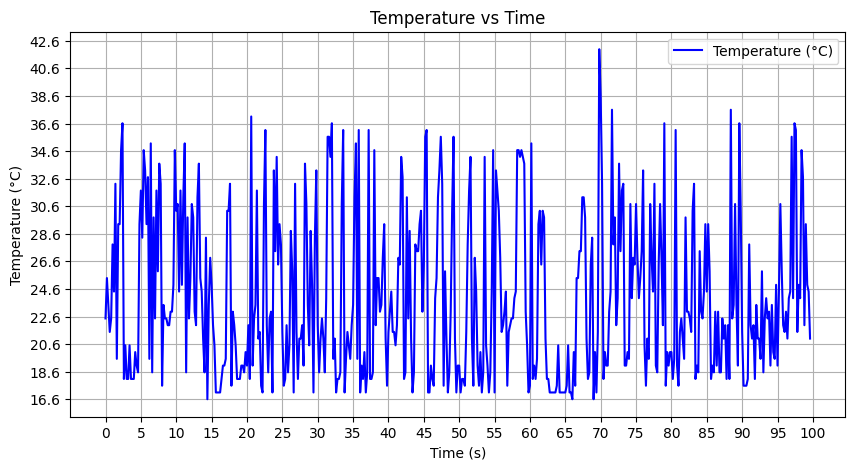

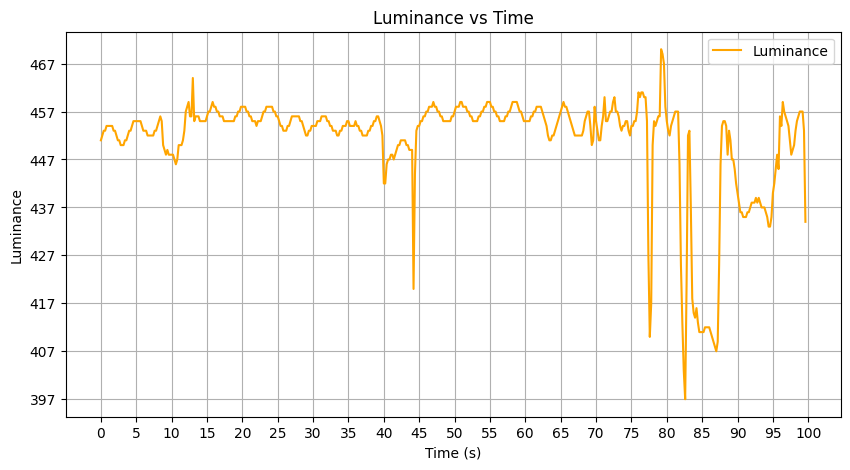

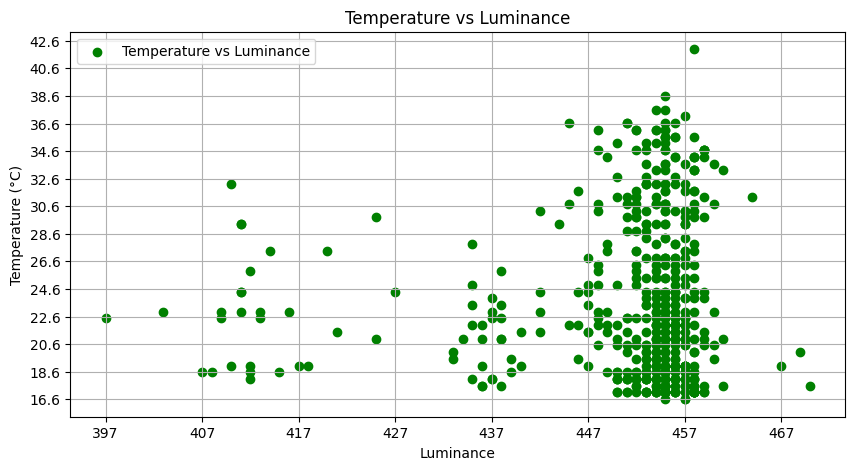

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming df is your DataFrame and it is already defined
# Convert columns to numeric, forcing errors to NaN
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df['Luminance'] = pd.to_numeric(df['Luminance'], errors='coerce')
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')

# Drop rows with NaN values if any conversion failed
df = df.dropna()

# Plot Temperature vs Time
plt.figure(figsize=(10, 5))
plt.plot(df['Time'], df['Temperature'], color='blue', label='Temperature (°C)')
plt.title('Temperature vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.legend()

# Adjust x and y ticks for more space
plt.xticks(np.arange(min(df['Time']), max(df['Time']) + 1, step=5))  # Adjust step as needed
plt.yticks(np.arange(min(df['Temperature']), max(df['Temperature']) + 1, step=2))  # Adjust step as needed

plt.show()

# Plot Luminance vs Time
plt.figure(figsize=(10, 5))
plt.plot(df['Time'], df['Luminance'], color='orange', label='Luminance')
plt.title('Luminance vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Luminance')
plt.grid()
plt.legend()

# Adjust x and y ticks for more space
plt.xticks(np.arange(min(df['Time']), max(df['Time']) + 1, step=5))  # Adjust step as needed
plt.yticks(np.arange(min(df['Luminance']), max(df['Luminance']) + 1, step=10))  # Adjust step as needed

plt.show()

# Plot Temperature vs Luminance
plt.figure(figsize=(10, 5))
plt.scatter(df['Luminance'], df['Temperature'], color='green', label='Temperature vs Luminance')
plt.title('Temperature vs Luminance')
plt.xlabel('Luminance')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.legend()

# Adjust x and y ticks for more space
plt.xticks(np.arange(min(df['Luminance']), max(df['Luminance']) + 1, step=10))  # Adjust step as needed
plt.yticks(np.arange(min(df['Temperature']), max(df['Temperature']) + 1, step=2))  # Adjust step as needed

plt.show()

## 2) Databases

For the databases part of this assignment, you will use the mimic-iii database from the laboratory session. Start by adding a few new tables to the database, using the SQL files included in the assignment's files. Open PGAdmin and connect to your mimic-iii database. **To properly load these tables, load the following files exactly and by the order presented.**

1) Run demographic.sql

2) Run lab_firstday.sql

You will now have to answer a few SQL questions.

**1.** Open the connection to your mimic-iii database. If you want, you can delete your credentials before submitting the assignment, but if you do so, please run the notebook first, for the results to be displayed.

In [5]:
from sqlalchemy import create_engine

# Define your connection parameters
username = 'postgres'
password = '1234'
host = 'localhost'  # or your database host
port = '5432'       # default PostgreSQL port
database = 'mimic-iii-2'  # name of your MIMIC-III database

# Create the connection string
connection_string = f'postgresql://{username}:{password}@{host}:{port}/{database}'

# Create an engine
engine = create_engine(connection_string)

# Connect to the database
connection = engine.connect()

**2.** Create a function that receives an SQL query and automatically opens a cursor, queries the database, extracts the columns, creates a pandas database, and closes the connections.

In [6]:
import pandas as pd
from sqlalchemy import create_engine, text

def query_to_dataframe(query, username, password, host='localhost', port='5432', database='mimic-iii-2'):
    """
    Executes an SQL query and returns the result as a pandas DataFrame.

    Parameters:
    - query (str): The SQL query to execute.
    - username (str): Database username.
    - password (str): Database password.
    - host (str): Database host (default is 'localhost').
    - port (str): Database port (default is '5432').
    - database (str): Database name (default is 'mimic').

    Returns:
    - pd.DataFrame: The result of the query as a pandas DataFrame.
    """
    # Create the connection string
    connection_string = f'postgresql://{username}:{password}@{host}:{port}/{database}'
    
    # Create an engine
    engine = create_engine(connection_string)
    
    try:
        # Open a connection
        with engine.connect() as connection:
            # Execute the query using text()
            result = connection.execute(text(query))
            
            # Fetch the data and create a pandas DataFrame
            df = pd.DataFrame(result.fetchall(), columns=result.keys())
    
    except Exception as e:
        print(f"An error occurred: {e}")
        return pd.DataFrame()  # Return an empty DataFrame on error
    
    # Return the DataFrame
    return df



**3.** Query the table admissions filtering for admission type as emergency and insurance as private.

In [7]:
# Define your SQL query
sql_query = "SELECT * FROM admissions WHERE admission_type = 'emergency' AND insurance = 'private'"

# Call the function and get the DataFrame
df = query_to_dataframe(sql_query, username, password, host, port, database)

# Display the DataFrame
print(df)


Empty DataFrame
Columns: [row_id, subject_id, hadm_id, admittime, dischtime, deathtime, admission_type, admission_location, discharge_location, insurance, language, religion, marital_status, ethnicity, edregtime, edouttime, diagnosis, hospital_expire_flag, has_chartevents_data]
Index: []


**4.** Query the table admissions, filtering for the same conditions as the previous exercise (admission type as emergency and insurance as private). Join the "drgcodes" table on the admission ID. Display only the columns regarding the subject id, admission id, time of death, and description of the drug.

In [8]:
# Define your SQL query
sql_query = "SELECT * FROM admissions WHERE admission_type = 'emergency' AND insurance = 'private'"

# Call the function and get the DataFrame
df = query_to_dataframe(sql_query, username, password, host, port, database)

# Display the DataFrame
print(df)

Empty DataFrame
Columns: [row_id, subject_id, hadm_id, admittime, dischtime, deathtime, admission_type, admission_location, discharge_location, insurance, language, religion, marital_status, ethnicity, edregtime, edouttime, diagnosis, hospital_expire_flag, has_chartevents_data]
Index: []


**5.1.** Obtain the dataset for this problem, by running the SQL query below.

In [9]:
query = "SELECT pivoted_lab.*," +\
                "gender as gender," +\
                "admission_age," +\
                "ethnicity_grouped as eth_grp," +\
                "hospital_expire_flag," +\
                "los_icu " +\
        "FROM demographics " +\
        "LEFT JOIN pivoted_lab " +\
        "ON demographics.icustay_id = pivoted_lab.icustay_id " +\
        "WHERE first_icu_stay = true"

# Call the function and get the DataFrame
df = query_to_dataframe(query, username, password, host, port, database)

# Display the DataFrame
df.tail()

subject_id  hadm_id  icustay_id  aniongap_min  aniongap_max  albumin_min  \
123       44083   198330      286428          16.0          16.0          NaN   
124       44154   174245      217724          15.0          15.0          NaN   
125       44212   163189      239396          15.0          21.0          2.9   
126       44222   192189      238186          11.0          15.0          NaN   
127       44228   103379      217992          12.0          18.0          2.2   

     albumin_max  bands_min  bands_max  bicarbonate_min  ...  sodium_max  \
123          NaN        NaN        NaN             21.0  ...       142.0   
124          NaN        NaN        NaN             19.0  ...       142.0   
125          3.0        NaN        NaN             18.0  ...       150.0   
126          NaN        NaN        NaN             22.0  ...       135.0   
127          2.7        NaN        NaN             15.0  ...       142.0   

     bun_min  bun_max  wbc_min  wbc_max  gender  admission_age  eth_grp  \
123     12.0     12.0     12.3     14.9       M           55.0    white   
124     16.0     21.0     12.2     17.1       M          300.0    white   
125     37.0     57.0      8.8     11.4       F           45.0    black   
126     21.0     24.0      9.3      9.9       M           73.0    white   
127     10.0     11.0      7.0     41.9       F           58.0    white   

     hospital_expire_flag  los_icu  
123                     0      3.0  
124                     1      0.0  
125                     0     31.0  
126                     0      1.0  
127                     0      4.0  

[5 rows x 46 columns]

**5.2.** Close the connection to your SQL server.

In [10]:
connection.close()

**5.3.** Prepare your dataset:

* Drop the ID columns of subject, admission and ICU stay.
* Drop columns with at least one NA value.
* Encode the categorical columns, the ethnicity and gender ('eth_grp', 'gender'). *Suggestion: use pd.get_dummies*
* Consider the column 'hospital_expire_flag' as the response and all remaining columns as the predictors.

In [11]:
# Step 1: Drop the ID columns of subject, admission, and ICU stay
# Replace 'subject_id', 'admission_id', and 'icu_stay_id' with your actual column names
df = df.drop(columns=['subject_id', 'hadm_id', 'icustay_id'])

# Step 2: Drop columns with at least one NA value
df = df.dropna(axis=1)

# Step 3: Encode the categorical columns 'eth_grp' and 'gender'
df = pd.get_dummies(df, columns=['eth_grp', 'gender'], drop_first=True)

# Step 4: Separate the response variable and predictors
X = df.drop(columns=['hospital_expire_flag'])  # Predictors
y = df['hospital_expire_flag']                  # Response variable

**6.** Fit the following tree-based classifiers to the dataset. For each method:

* Perform k-fold cross validation to evaluate the models. Consider 10 folds.

* Plot the ROC curves for each fold, along with the mean ROC curve.

* Calculate the mean AUC.

**a.** Decision tree.

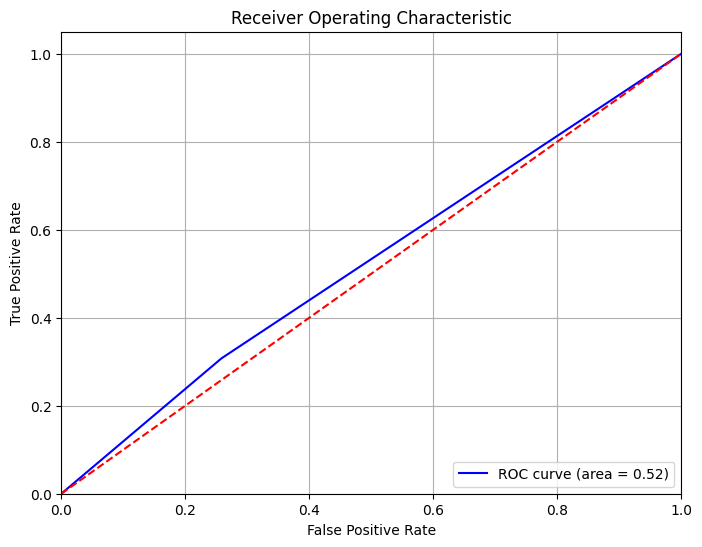

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
# Set up K-Fold cross-validation
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize the Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)

# Get predicted probabilities using cross-validation
y_scores = cross_val_predict(classifier, X, y, cv=kf, method='predict_proba')[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid()
plt.show()

**b.** Random forest

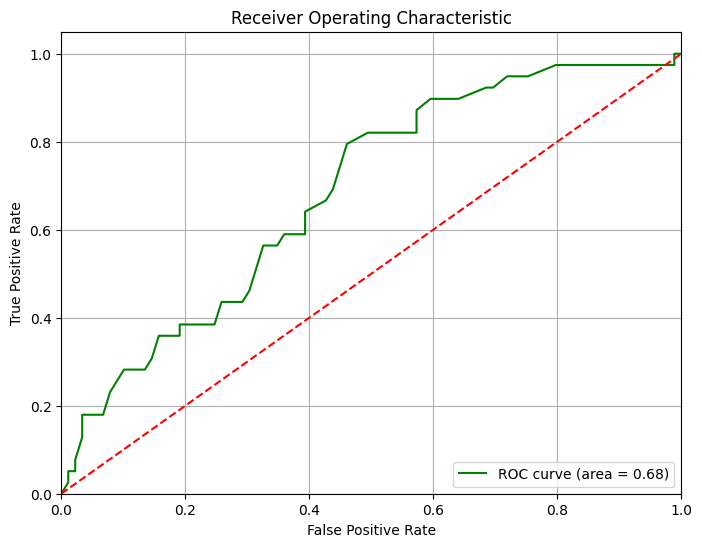

In [13]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest Classifier
classifier = RandomForestClassifier(random_state=42)

# Get predicted probabilities using cross-validation
y_scores = cross_val_predict(classifier, X, y, cv=kf, method='predict_proba')[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid()
plt.show()

**c.** Gradient Boosting

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42) #42 is the solution

# Initialize the Gradient Boosting Classifier
classifier = GradientBoostingClassifier(random_state=42)

# Perform k-fold cross-validation
accuracies = cross_val_score(classifier, X_train, y_train, cv=kf)

# Calculate mean and standard deviation of accuracies
mean_accuracy = accuracies.mean()
std_accuracy = accuracies.std()

print(f'Mean Accuracy: {mean_accuracy:.2f}')
print(f'Standard Deviation: {std_accuracy:.2f}')

# Fit the model on the entire training set
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Set Accuracy: {test_accuracy:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Mean Accuracy: 0.61
Standard Deviation: 0.15
Test Set Accuracy: 0.82
Confusion Matrix:
[[28  5]
 [ 2  4]]


**7.1.** Perform a grid search cross-validation on the Gradient boosting methods, changing the value of the learning rate (0.01 to 0.5) and the number of estimators (50-500). Consider the mean AUC of the folds as the performance measure.

In [15]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'learning_rate': np.arange(0.01, 0.51, 0.01),  # Learning rates from 0.01 to 0.5
    'n_estimators': np.arange(50, 200, 50)          # Number of estimators from 50 to 500
}

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=gb_classifier,
                           param_grid=param_grid,
                           scoring='roc_auc',  # Use AUC as the scoring metric
                           cv=10,              # 10-fold cross-validation
                           n_jobs=-1,          # Use all available cores
                           verbose=1)          # Verbose output

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the results
print("Best Parameters:", best_params)
print("Best AUC Score from Cross-Validation:", best_score)

# Optionally, evaluate the model on the test set
best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_pred_proba)

print("Test AUC Score:", test_auc)



Fitting 10 folds for each of 150 candidates, totalling 1500 fits
Best Parameters: {'learning_rate': 0.48000000000000004, 'n_estimators': 50}
Best AUC Score from Cross-Validation: 0.7005952380952382
Test AUC Score: 0.9083333333333333


**7.2.** Plot a scatterplot of the learning rate versus the number of estimators, with the mean AUC as the color gradient.

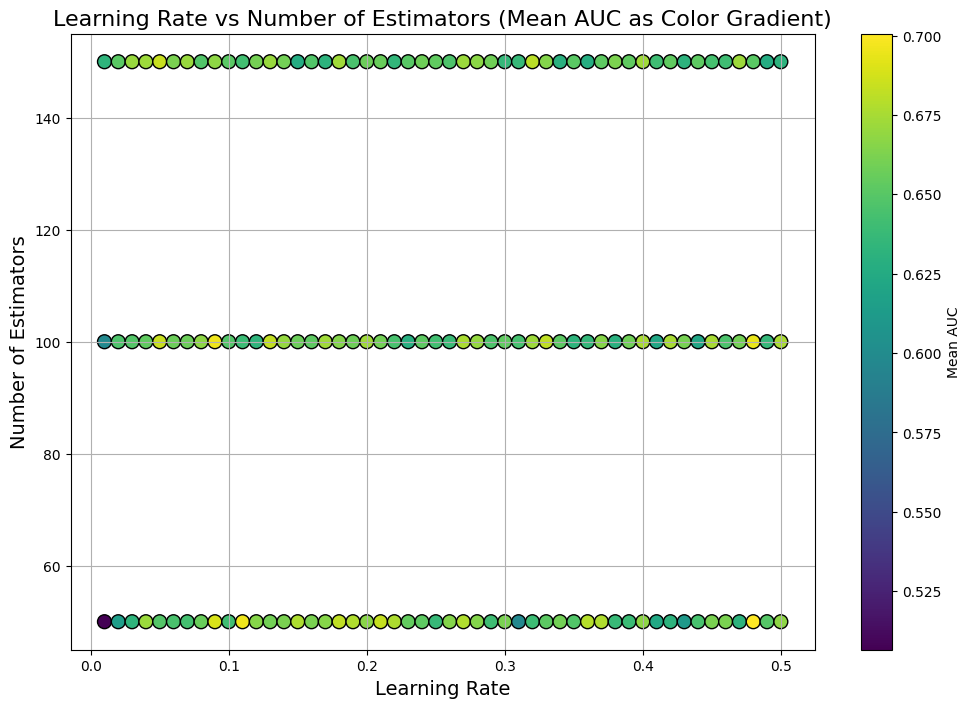

In [16]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'results' DataFrame contains the grid search results
# Create a DataFrame from the grid search results
results = pd.DataFrame(grid_search.cv_results_)

# Extract relevant columns
plot_data = results[['param_learning_rate', 'param_n_estimators', 'mean_test_score']]

# Rename columns for easier access
plot_data.columns = ['Learning Rate', 'Number of Estimators', 'Mean AUC']

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    plot_data['Learning Rate'],
    plot_data['Number of Estimators'],
    c=plot_data['Mean AUC'],
    cmap='viridis',  # You can choose other colormaps like 'plasma', 'coolwarm', etc.
    s=100,           # Size of the points
    edgecolor='k'    # Edge color for better visibility
)

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Mean AUC')

# Set labels and title
plt.title('Learning Rate vs Number of Estimators (Mean AUC as Color Gradient)', fontsize=16)
plt.xlabel('Learning Rate', fontsize=14)
plt.ylabel('Number of Estimators', fontsize=14)
plt.grid(True)

# Show the plot
plt.show()

**8.1.** Perform forward stepwise selection on the dataset. Use the best parameters of the gradient boosting method obtained in **7.1.**.

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import roc_auc_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Best parameters from the previous grid search
best_learning_rate = 0.1  # Replace with the best learning rate found
best_n_estimators = 100    # Replace with the best number of estimators found

# Initialize the Gradient Boosting Classifier with best parameters
gb_classifier = GradientBoostingClassifier(
    learning_rate=best_learning_rate,
    n_estimators=best_n_estimators,
    random_state=42
)

# Initialize the Sequential Feature Selector for forward selection
sfs = SequentialFeatureSelector(
    gb_classifier,
    n_features_to_select='auto',  # You can specify the number of features to select
    direction='forward',
    scoring='roc_auc',  # Use AUC as the scoring metric
    cv=5,              # Number of cross-validation folds
    n_jobs=-1          # Use all available cores
    )

# Fit the selector to the training data
sfs.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[sfs.get_support()].tolist()
print("Selected Features:", selected_features)

# Evaluate the model on the test set with selected features
gb_classifier.fit(X_train[selected_features], y_train)
y_test_pred_proba = gb_classifier.predict_proba(X_test[selected_features])[:, 1]
test_auc = roc_auc_score(y_test, y_test_pred_proba)

print("Test AUC with Selected Features:", test_auc)

Selected Features: ['chloride_min', 'chloride_max', 'glucose_min', 'glucose_max', 'potassium_min', 'sodium_min', 'bun_max', 'wbc_max', 'admission_age', 'eth_grp_black', 'eth_grp_hispanic', 'eth_grp_native', 'eth_grp_other', 'eth_grp_unknown']
Test AUC with Selected Features: 0.7166666666666667


**8.2.** Compare and comment the results from **8.1.** with the features importance obtained through the grid search of queastion **7.1.**.

In [18]:
# Assuming 'gb_classifier' is the fitted Gradient Boosting model
# and 'X_train_df' is the DataFrame containing the training features.

# Get feature importance from the Gradient Boosting model
feature_importance = gb_classifier.feature_importances_



# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importance
})



# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print("Feature Importance from Gradient Boosting:")
print(importance_df)

# Compare with selected features from forward stepwise selection
selected_features_set = set(selected_features)

# Create a DataFrame for selected features
selected_importance_df = importance_df[importance_df['Feature'].isin(selected_features_set)]

# Print selected features and their importance
print("\nSelected Features from Forward Stepwise Selection and their Importance:")
print(selected_importance_df)

Feature Importance from Gradient Boosting:
             Feature  Importance
8      admission_age    0.287392
2        glucose_min    0.231896
7            wbc_max    0.156541
5         sodium_min    0.082188
3        glucose_max    0.076133
6            bun_max    0.070711
0       chloride_min    0.038338
4      potassium_min    0.033143
1       chloride_max    0.021357
12     eth_grp_other    0.001815
10  eth_grp_hispanic    0.000488
9      eth_grp_black    0.000000
11    eth_grp_native    0.000000
13   eth_grp_unknown    0.000000

Selected Features from Forward Stepwise Selection and their Importance:
             Feature  Importance
8      admission_age    0.287392
2        glucose_min    0.231896
7            wbc_max    0.156541
5         sodium_min    0.082188
3        glucose_max    0.076133
6            bun_max    0.070711
0       chloride_min    0.038338
4      potassium_min    0.033143
1       chloride_max    0.021357
12     eth_grp_other    0.001815
10  eth_grp_hispanic    0.

## 3) Theoretical Questions

**1.** Consider a dataset where best subset, forward stepwise and backward stepwise selection will be performed. For each of the 3 approaches, we obtain $p+1$ models, $p$ being the total number of predictors. This means that each approach has a model with 0 predictors, one with 1 predictor, one with 2 predictor, up until one model with $p$ predictors. Answer and justify the following questions:

**a)** Which of the three models with $k, \, \forall_{k \in [0,p]}$ predictors has the smallest training RSS?

**Answer:** Best subset selection, because this model evaluates all possible combinations of k predictors, which minimises the value of the training RSS.

**b)** Which of the three models with $k, \, \forall_{k \in [0,p]}$ predictors has the smallest test RSS?

**Answer:** In the case of the test RSS, it is not possible to determine for sure which model will have the smallest test RSS, since it will depend on the model's ability to generalize to new data. This will ultimately depend on the bias-variance tradeoff of the chosen model.

**c)** Evaluate the following statements with *true* or *false*. Justify your answers.

    i. The predictors in the k-variable model identified by forward stepwise selection are a subset of the predictors in the (k+1)-variable model identified by forward stepwise selection.

**True**. The forward stepwise selection model works by adding one predictor at a time to an initially empty model, making it sequential in nature, and meaning it retains all features of previous models as k increases.

    ii. The predictors in the k-variable model identified by backward stepwise selection are a subset of the predictors in the (k + 1)-variable model identified by backward stepwise selection.

**True**. Similarly to forward stepwise selection, the backward stepwise selection model removes predictors one by one from an initially full model, making for an also sequential nature in which higher k value models include all previous predictors.

    iii. The predictors in the k-variable model identified by backward stepwise selection are a subset of the predictors in the (k + 1)-variable model identified by forward stepwise selection.

**False**. As previously mentioned, forward and backward stepwise selection models utilise different approaches (one sequentially adding predictors, the other sequentially removing them), which will not necessary result in the same predictors being selected.

    iv. The predictors in the k-variable model identified by forward stepwise selection are a subset of the predictors in the (k+1)-variable model identified by backward stepwise selection.

**False**. As answered above, the different approaches used in each model make it so they are not guaranteed to align in such a way that one can be considered to be the subset of the other.

    v. The predictors in the k-variable model identified by best subset selection are a subset of the predictors in the (k + 1)-variable model identified by best subset selection.

**False**. Best subset selection identifies the best model for each k predictor
by evaluating all possible combinations of k predictors and choosing the subset that better fits the evaluation criterion (for example, minimizes the residual sum of squares (RSS)). Unlike the previous two models, it doesn't build upon previous models and instead it starts fresh for each k, which means the k-variable model does not necessarily have to be included in the
(k+1)-variable model.

**2.** Ridge regression tends to give similar coefficient values to correlated variables, whereas lasso regression may give substantially different coefficients to correlated variables. This questions explores this property in a simplified setting.

Suppose that $n=2$, $p=2$, $x_{11} = x_{12}$, $x_{21} = x_{22}$. Moreover, suppose that $y_1 + y_2 = 0$ and $x_{11} + x_{21} = 0$ and $x_{12} + x_{22} = 0$, meaning that the estimate for the intercept in a least squares, ridge regression, or lasso regression is zero: $\hat{\beta} = 0$.

**a)** Write the ridge regression optimization problem in this setting.

**Answer:**

Ridge Regression aims to minimize the RSS by introducing a shrinkage penalty, which shrinks the coefficients towards zero to prevent overfitting. This is given by the following formula:

\\(\min\sum_{i=1}^n \left( y_i - \beta_0 - \sum_{j=1}^p\beta_jx_{ij} \right)^2 +\lambda\sum_{j=1}^p\beta_j^2 \\)

Taking into account the information provided (n=2, p=2, x11=x12, x21=x22), and conisdering \\(\beta=0\\) (let's assume the data is centered):

\\(\min_{\beta_1, \beta_2} \; \sum_{i=1}^n \left( y_i - (\beta_1 x_{i1} + \beta_2 x_{i2}) \right)^2 + \lambda (\beta_1^2 + \beta_2^2) \\)

Since ( y2 = -y1 ), ( x21 = -x11 ), and ( x22 = -x12 ), we can expand the sum and rewrite the optimization problem as:

\\(\min_{\beta} \left( (y_1 - (x_{11} \beta_1 + x_{12} \beta_2))^2 + (-y_1 - (-x_{11} \beta_1 - x_{12} \beta_2))^2 + \lambda (\beta_1^2 + \beta_2^2) \right) \\)

This simplifies to:

\\( \min_{\beta} \left( (y_1 - (x_{11} \beta_1 + x_{12} \beta_2))^2 + (y_1 - (x_{11} \beta_1 + x_{12} \beta_2))^2 + \lambda (\beta_1^2 + \beta_2^2) \right) \\)

Thus, the ridge regression optimization problem in this setting is:

\\(\min_{\beta} \left( 2(y_1 - (x_{11} \beta_1 + x_{12} \beta_2))^2 + \lambda (\beta_1^2 + \beta_2^2) \right) \\)

**b)** Prove that in this setting, the ridge regression coefficient estimates satisfy $\hat{\beta}_1 = \hat{\beta}_2$.

**Answer:**

To find the optimal \\(\beta\\), we take the gradient of the objective function with respect to \\(\beta\\) and set it to zero. The objective function can be expressed as:

\\(L(\beta_1,\beta_2) = 2(y_1 - (x_{11} \beta_1 + x_{12} \beta_2))^2 + \lambda (\beta_1^2 + \beta_2^2) \\)

Taking the partial derivatives with respect to \\(\beta_1\\) and \\(\beta_2\\):

Partial derivative with respect to \\(\beta_1\\):

\\(\frac{\partial L}{\partial \beta_1} = 2 \cdot 2(y_1 - (x_{11} \beta_1 + x_{12} \beta_2))(-x_{11}) + 2\lambda \beta_1 = 0 \\)

This simplifies to:\\( -4x_{11}(y_1 - (x_{11} \beta_1 + x_{12} \beta_2)) + 2\lambda \beta_1 = 0 \\)

Partial derivative with respect to \\(\beta_2\\):

\\( \frac{\partial L}{\partial \beta_2} = 2 \cdot 2(y_1 - (x_{11} \beta_1 + x_{12} \beta_2))(-x_{12}) + 2\lambda \beta_2 = 0 \\)

This simplifies to:\\( -4x_{12}(y_1 - (x_{11} \beta_1 + x_{12} \beta_2)) + 2\lambda \beta_2 = 0\\)

From symmetry, the two derivatives are very similar, and since x11=x22, we can conclude that \\(\beta_1=\beta_2\\) because both equations are identical in form and are solved under the same conditions. Therefore, the symmetry of the data forces the solution to be \\(\beta_1=\beta_2\\).

**c)** Write the lasso regression optimization problem in this setting.

**Answer:**

The lasso regression optimization problem is similar to ridge regression, but instead of using the sum of squared coefficients in the penalty term, lasso uses the L1-norm of the coefficients.It is possible to optimise this problem starting from the following formula:

\\(\min_{\beta}\sum_{i=1}^n \left(y_i - \beta_0 - \sum_{j=1}^p\beta_jx_{ij}\right)^2 +\lambda\sum_{j=1}^p |\beta_j|\\)

Taking into account the information provided (n=2, p=2, x11=x12, x21=x22), and conisdering \\(\beta=0\\) (let's assume the data is centered):

\\(\min_{\beta_1, \beta_2}\sum_{i=1}^n \left( y_i - (\beta_1 x_{i1} + \beta_2 x_{i2}) \right)^2 + \lambda |\beta|_1 +\lambda |\beta|_2 \\)

Since ( y2 = -y1 ), ( x21 = -x11 ), and ( x22 = -x12 ), we can expand the sum and rewrite the optimization problem as:

\\(\min_{\beta} \left( (y_1 - (x_{11} \beta_1 + x_{12} \beta_2))^2 + (-y_1 - (-x_{11} \beta_1 - x_{12} \beta_2))^2 + \lambda (|\beta_1| + |\beta_2|) \right) \\)

This simplifies to:

\\(\min_{\beta} \left( (y_1 - (x_{11} \beta_1 + x_{12} \beta_2))^2 + (y_1 - (x_{11} \beta_1 + x_{12} \beta_2))^2 + \lambda (|\beta_1| + |\beta_2|) \right) ]\\)

Thus, the lasso regression optimization problem in this setting is:

\\( \min_{\beta} \left( 2(y_1 - (x_{11} \beta_1 + x_{12} \beta_2))^2 + \lambda (|\beta_1| + |\beta_2|) \right) \\)

**d)** Prove that in this setting, the lasso regression coefficients $\hat{\beta}_1$ and $\hat{\beta}_2$ are not unique, meaning that there are many possible solutions to the optimization problem in (c). Describe these solutions.

**Answer:**

The objective function can be rewritten as:

\\(L(\beta_1,\beta_2) = 2(y_1 - (x_{11} \beta_1 + x_{12} \beta_2))^2 + \lambda (|\beta_1| + |\beta_2|)\\)

Since (x11 = x12) and (x21 = x22), the two predictors are perfectly correlated. This means that any linear combination of \\(\beta_1\\) and \\(\beta_2\\) that maintains the same ratio will yield the same fitted value for the response variable.

Given the perfect correlation between the predictors, we can express one coefficient in terms of the other. Specifically, if we let: \\(\beta_2 = k \beta_1 \\) for some scalar (k), we can substitute this into the objective function:

\\(L(k \beta_1) = 2(y_1 - (x_{11} \beta_1 + x_{12} (k \beta_1)))^2 + \lambda (|\beta_1| + |k \beta_1|) \\)

This simplifies to:

\\(L(k \beta_1) = 2(y_1 - (x_{11} + k x_{12}) \beta_1)^2 + \lambda (1 + |k|) |\beta_1| \\)

The optimization problem will yield the same value of the objective function for any (k) that satisfies the relationship between \\(\beta_1\\) and \\(\beta_2\\). This means that there are infinitely many pairs \\((\beta_1, \beta_2)\\) that yield the same fitted values and thus the same loss. This demonstrates the non-uniqueness of the coefficients.


**3.** Draw an example of a partition of two-dimensional feature space that could result from recursive binary splitting. Your example should contain at least six regions. Draw a decision tree corresponding to this partition. Be sure to label all aspects of your figures, including the regions R1, R2,..., the cutpoints t1, t2,..., and so forth.

If you prefer you can draw it by hand or in any software and use a scan of it.

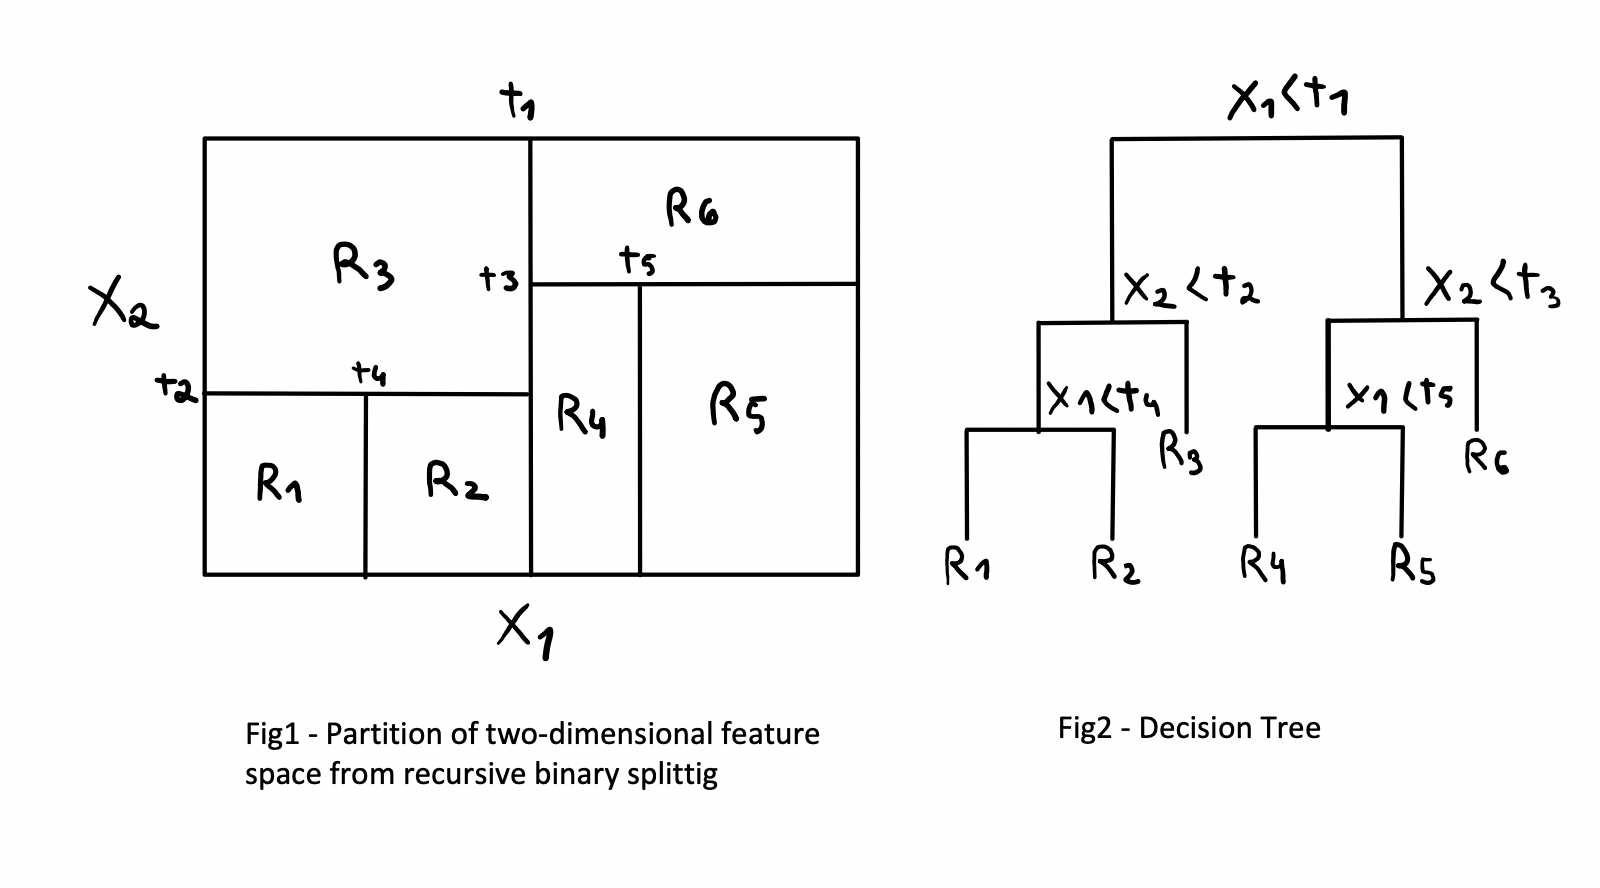

In [19]:
from IPython.display import Image
Image("Fotos/Gráficos 3.png")

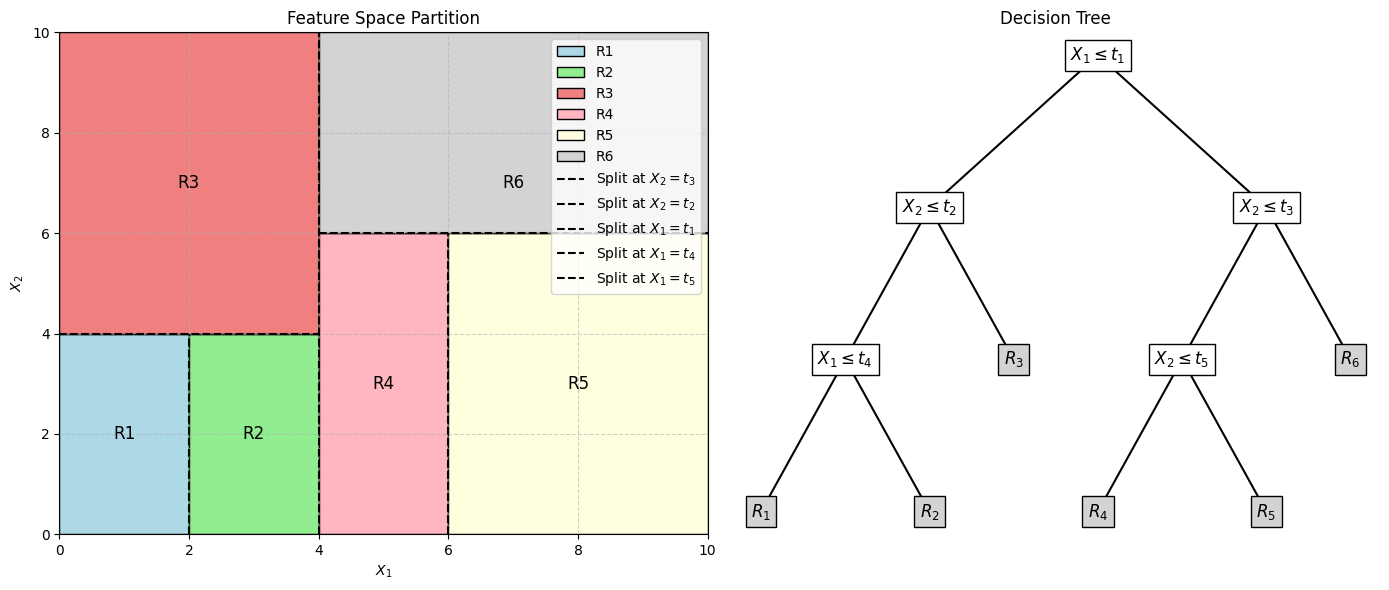

In [20]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def plot_feature_partition_and_tree():
    # Create a figure with two subplots (side by side)
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    # --- Left Plot: Feature Space Partition ---
    ax = axs[0]
    ax.set_title("Feature Space Partition")
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_xlabel("$X_1$")
    ax.set_ylabel("$X_2$")
    ax.grid(True, linestyle='--', alpha=0.6)
    
    # Draw regions and boundaries
    # Region R1
    ax.add_patch(Rectangle((0, 0), 2, 4, facecolor="lightblue", edgecolor="black", label="R1"))
    ax.text(1, 2, "R1", fontsize=12, ha='center', va='center')

    # Region R2
    ax.add_patch(Rectangle((2, 0), 2, 4, facecolor="lightgreen", edgecolor="black", label="R2"))
    ax.text(3, 2, "R2", fontsize=12, ha='center', va='center')

    # Region R3
    ax.add_patch(Rectangle((0, 4), 4, 6, facecolor="lightcoral", edgecolor="black", label="R3"))
    ax.text(2, 7, "R3", fontsize=12, ha='center', va='center')

    # Region R4
    ax.add_patch(Rectangle((4, 0), 2, 6, facecolor="lightpink", edgecolor="black", label="R4"))
    ax.text(5, 3, "R4", fontsize=12, ha='center', va='center')

    # Region R5
    ax.add_patch(Rectangle((6, 0), 4, 6, facecolor="lightyellow", edgecolor="black", label="R5"))
    ax.text(8, 3, "R5", fontsize=12, ha='center', va='center')

    # Region R6
    ax.add_patch(Rectangle((4, 6), 6, 4, facecolor="lightgray", edgecolor="black", label="R6"))
    ax.text(7, 7, "R6", fontsize=12, ha='center', va='center')

    # Add split lines (ensure no unnecessary lines)
    ax.axhline(y=6, xmin=0.4, xmax=1, color="black", linestyle="--", label="Split at $X_2 = t_3$")
    ax.axhline(y=4, xmin=0, xmax=0.4, color="black", linestyle="--", label="Split at $X_2 = t_2$")
    ax.axvline(x=4, ymin=0, ymax=1, color="black", linestyle="--", label="Split at $X_1 = t_1$")
    ax.axvline(x=2, ymin=0, ymax=0.4, color="black", linestyle="--", label="Split at $X_1 = t_4$")
    ax.axvline(x=6, ymin=0, ymax=0.6, color="black", linestyle="--", label="Split at $X_1 = t_5$")
    
    # Legend
    ax.legend(loc="upper right", fontsize=10, frameon=True)
    
    # --- Right Plot: Decision Tree ---
    ax = axs[1]
    ax.set_title("Decision Tree")
    ax.axis("off")
    
    # Expanded decision tree
    # Nodes
    ax.text(0.5, 1.0, "$X_1 \\leq t_1$", ha="center", va="center", fontsize=12, bbox=dict(facecolor="white", edgecolor="black"))
    ax.text(0.3, 0.75, "$X_2 \\leq t_2$", ha="center", va="center", fontsize=12, bbox=dict(facecolor="white", edgecolor="black"))
    ax.text(0.7, 0.75, "$X_2 \\leq t_3$", ha="center", va="center", fontsize=12, bbox=dict(facecolor="white", edgecolor="black"))
    ax.text(0.2, 0.5, "$X_1 \\leq t_4$", ha="center", va="center", fontsize=12, bbox=dict(facecolor="white", edgecolor="black"))
    ax.text(0.6, 0.5, "$X_2 \\leq t_5$", ha="center", va="center", fontsize=12, bbox=dict(facecolor="white", edgecolor="black"))
    ax.text(0.4, 0.5, "$R_3$", ha="center", va="center", fontsize=12, bbox=dict(facecolor="lightgray", edgecolor="black"))
    ax.text(0.5, 0.25, "$R_4$", ha="center", va="center", fontsize=12, bbox=dict(facecolor="lightgray", edgecolor="black"))
    ax.text(0.7, 0.25, "$R_5$", ha="center", va="center", fontsize=12, bbox=dict(facecolor="lightgray", edgecolor="black"))
    ax.text(0.8, 0.5, "$R_6$", ha="center", va="center", fontsize=12, bbox=dict(facecolor="lightgray", edgecolor="black"))
    ax.text(0.1, 0.25, "$R_1$", ha="center", va="center", fontsize=12, bbox=dict(facecolor="lightgray", edgecolor="black"))
    ax.text(0.3, 0.25, "$R_2$", ha="center", va="center", fontsize=12, bbox=dict(facecolor="lightgray", edgecolor="black"))

    # Connect the nodes with lines
    ax.plot([0.5, 0.3], [1.0, 0.75], color="black")  # Main split left
    ax.plot([0.5, 0.7], [1.0, 0.75], color="black")  # Main split right
    ax.plot([0.3, 0.2], [0.75, 0.5], color="black")  # Left subtree split
    ax.plot([0.3, 0.4], [0.75, 0.5], color="black")  # Left subtree split
    ax.plot([0.2, 0.1], [0.5, 0.25], color="black")  # Terminal left split
    ax.plot([0.2, 0.3], [0.5, 0.25], color="black")  # Terminal right split
    ax.plot([0.7, 0.6], [0.75, 0.5], color="black")  # Right subtree split
    ax.plot([0.7, 0.8], [0.75, 0.5], color="black")  # Right subtree split
    ax.plot([0.6, 0.5], [0.5, 0.25], color="black")  # Terminal left split
    ax.plot([0.6, 0.7], [0.5, 0.25], color="black")  # Terminal right split

    plt.tight_layout()
    plt.show()

# Run the function
plot_feature_partition_and_tree()

**4.** In 2 dimensions, a linear decision boundary takes the form $\beta_0 + \beta_1 X_1 + \beta_2 X_2 = 0$. Consider a nn-linear decision boundary:

**a)** Sketch the curve

$$(1 + X_1)^2 + (2 - X_2)^2 = 4$$

Additionally, indicate on your sketch the set of points that verify the condition

$$(1 + X_1)^2 + (2 - X_2)^2 > 4$$

and the condition

$$(1 + X_1)^2 + (2 - X_2)^2 \leq 4$$

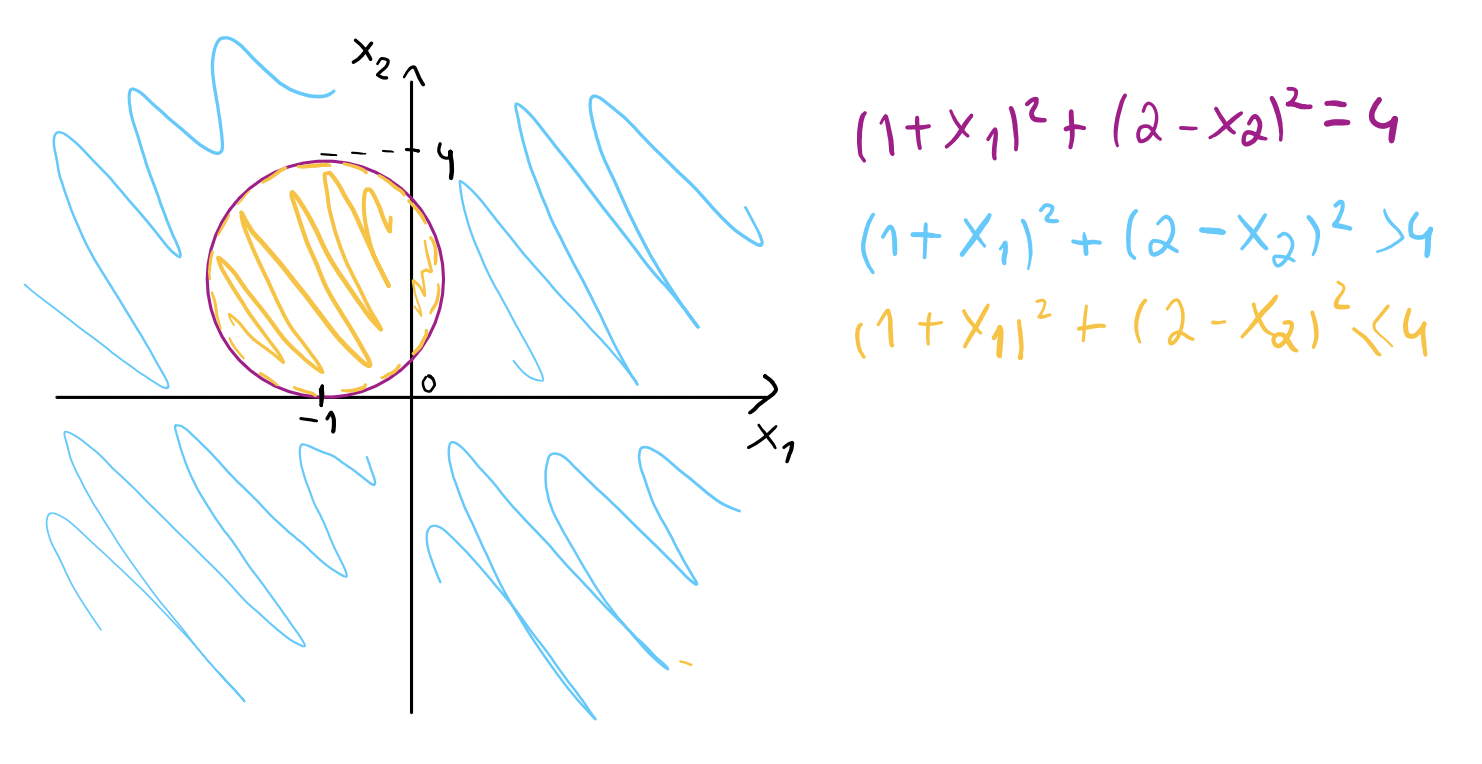

In [21]:
from IPython.display import Image
Image("Fotos/Gráfico 4_a.png")

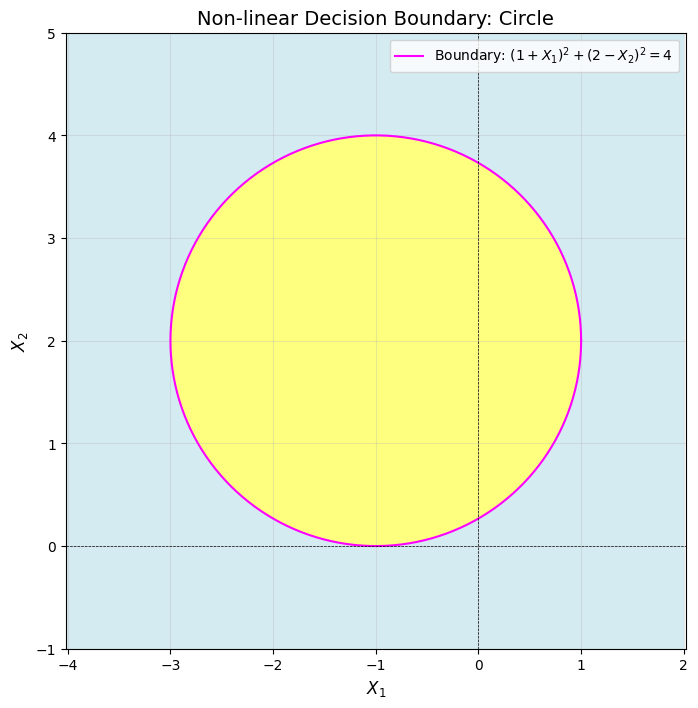

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define the circle parameters
center = (-1, 2)
radius = 2

# Generate points for the circle
theta = np.linspace(0, 2 * np.pi, 500)
x_circle = center[0] + radius * np.cos(theta)
y_circle = center[1] + radius * np.sin(theta)

# Create the plot
plt.figure(figsize=(8, 8))
plt.plot(x_circle, y_circle, label="Boundary: $(1 + X_1)^2 + (2 - X_2)^2 = 4$", color="magenta")
# Generate a grid of points for the regions
x = np.linspace(center[0] - radius - 1, center[0] + radius + 1, 500)
y = np.linspace(center[1] - radius - 1, center[1] + radius + 1, 500)
X, Y = np.meshgrid(x, y)
Z = (1 + X)**2 + (2 - Y)**2

# Fill regions
plt.contourf(X, Y, Z, levels=[0, 4], colors=["yellow"], alpha=0.5)  # Inside region
plt.contourf(X, Y, Z, levels=[4, np.max(Z)], colors=["lightblue"], alpha=0.5)  # Outside region

# Add labels and legend
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.title("Non-linear Decision Boundary: Circle", fontsize=14)
plt.xlabel("$X_1$", fontsize=12)
plt.ylabel("$X_2$", fontsize=12)
plt.axis("equal")
plt.legend(loc="upper right")
plt.grid(alpha=0.3)
plt.show()


**b)** Suppose that a classifier assigns an observation to the blue class if $(1 + X_1)^2 + (2 - X_2)^2 > 4$ and to the red class otherwise. To what class are the following observations classified? (0,0), (-1,1), (2,2), (3,8)

**Answer:**

For (0,0):  \\((1 + 0)^2 + (2 - 0)^2 = 1^2 + 2^2 = 1 + 4 = 5 > 4 \\)

So (0,0) is classified as Blue. Proceding the same way for all other observations we have:

(-1,1) -> Red

(2,2) -> Blue

(3,8) -> Blue

**c)** Prove that while the decision boundary in (b) is not linear in terms of $X_1$ and $X_2$, it is linear in terms of $X_1$, $X_1^2$, $X_2$, and $X_2^2$.

**Answer:**

The decision boundary is given by:

\\( (1 + X_1)^2 + (2 - X_2)^2 = 4 \\)

Expanding this equation:

\\( (1 + X_1)^2 = 1 + 2X_1 + X_1^2 \\)

\\((2 - X_2)^2 = 4 - 4X_2 + X_2^2 \\)

Combining these, we have:

\\( 1 + 2X_1 + X_1^2 + 4 - 4X_2 + X_2^2 = 4 \\)

Simplifying:

\\( X_1^2 + X_2^2 + 2X_1 - 4X_2 + 1 = 0 \\)

Rearranging gives:

\\( X_1^2 + X_2^2 + 2X_1 - 4X_2 = -1 \\)

This equation is quadratic in (X1) and (X2), but if we consider the transformation:

Let \\(A = X_1\\), \\(B = X_2\\), \\(C = X_1^2\\) and \\(D = X_2^2\\)
The decision boundary can be expressed as a linear equation in terms of \\((X_1, X_2, X_1^2, X_2^2)\\):

\\( C + D + 2A - 4B + 1 = 0  \\)

# 4) Laboratory Questions

What are the advantages and disadvantages of relational dabases versus graph databases, and when should one type be preferred over the other?

**Answer:**

Relational Databases organize data in tables, where the data points are evaluated based on certain relevant attributes and related based on them. The tables are constituted by rows that represent each data point and columns that represent the varied properties that are being evaluated. This organization of data allows for the usage of SQL to update and change data. A Graph Database, on the other hand, organizes data in nodes and edges, where every node represents a data point and it's properties, while an edge represents relationships between certain nodes. Graph Databases use specializes languages to query.

From a basic description of both models we can notice that in general, Relational Databases are best at storing structured data with very clear properties to be analyzed and related between tables, while Graph Databases excel at evidencing complex relationships between nodes, while also being more flexible than a Relational Database because it's structure for storage isn't so strict. Another important aspect to consider it's that the model of Relational Databases is a much more established model than Graph Databases, being adopted earlier because of its simplicity and applicability to simple tasks, like inventory management for instance, while Graph databases surged later and aren't as widely used, possibly presenting a challenge to a new user for its necessity for different query languages.

Concluding, Relational Databases are best suited to store well-structured data with clear parameters to be measured, for tasks like inventory management, storing census information or medical records, while Graph Databases are best at storing data with complex relationships between data points, like for social networks.